Выполнил Полыгалов Богдан, 2 группа.<br>
Выбранный организм – zebrafish, митохондриальная хромосома (chrM.fa)


# **Перед началом работы**

Скачаем файл:

In [ ]:
!wget https://hgdownload.soe.ucsc.edu/goldenPath/danRer6/chromosomes/chrM.fa.gz
!gunzip ./chrM.fa.gz

--2022-06-28 18:36:30--  https://hgdownload.soe.ucsc.edu/goldenPath/danRer6/chromosomes/chrM.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5580 (5.4K) [application/x-gzip]
Saving to: ‘chrM.fa.gz’

chrM.fa.gz          100%[===================>]   5.45K  --.-KB/s    in 0s      

2022-06-28 18:36:31 (1.08 GB/s) - ‘chrM.fa.gz’ saved [5580/5580]



In [ ]:
!head chrM.fa

>chrM
ACGGCCGGCGACAATTTATATGTCAATGTTTTAGTAATTTACAATTAAGA
CAGACATGCACTGTATTGATACATTAATCATACATAAAATGCATGCTCTA
ATTTTTACATATGCATGTGCAAGCATATACATATGTGTGGATACACACGT
ATGTGCTTTGTCACATGTATGTACTGGTTACATATTATGCATGTATTAGG
ACATACTATGTATTATCACCATATCATTATTTTAACCATAAAGCAGGTAC
ATAATGTTTATATTATTCACCATATCAAGTGAGAGACCACCAATAATTTA
TATAAATGCATATCATGCATGATAGAATCAGGGACATCAATTTAAACGTT
GTTAAAAAATGAACTATTCCTGGTATCTGGTTCAAATCTCACGTTCATCG
CTACAAGACCCACCCACAATCTAGTGGTAAACGGCATATGATTAGTCAGA


# **Сколько участков Z-ДНК найдено в геноме?**

Для нахождения Z-ДНК используем приложенную к заданию программу (zhunt3- alan.c): компилируем её и запускаем с нашей хромосомой.

In [ ]:
!gcc zhunt3-alan.c -lm -o zhunt3
!chmod a+x zhunt3
!./zhunt3 12 8 12 chrM.fa

zhunt3-alan.c: In function ‘user_regret’:
zhunt3-alan.c:303:7: warning: implicit declaration of function ‘gets’; did you mean ‘fgets’? [-Wimplicit-function-declaration]
       gets( tempstr );
       ^~~~
       fgets
/tmp/ccKCGbbZ.o: In function `user_regret':
zhunt3-alan.c:(.text+0xba6): warning: the `gets' function is dangerous and should not be used.
dinucleotides 12
min/max 8 12
min/max 8 12
operating on chrM.fa
calculating zscore
opening chrM.fa
inputting sequence
opening chrM.fa.Z-SCORE

 run time=3 sec
use min/max 8 12
analyzing_zscore
opening chrM.fa.Z-SCORE
opening chrM.fa
inputting sequence


Так как хромосома маленькая, то процесс занял всего 3 секунды.

В полученном файле предсказания (chrM.fa.Z-SCORE) нам нужно отобрать строки, в которых Z-SCORE больше 300 или 400 (я использовал 300), поскольку чем больше это число, тем проще формирование Z-ДНК.

In [ ]:
import pandas as pd
z=pd.read_csv("chrM.fa.Z-SCORE", skiprows=1, names=["Start","End","1","2","3","Score","Seq","4"], delim_whitespace=True)
z_dna = z.loc[z['Score'] >= 300]
len(z_dna)

26

Получается 26 участков Z-ДНК.

In [ ]:
z_dna

,Start,End,1,2,3,Score,Seq,4
104,105,123,18,22.248,50.648,308.9198,tttacatatgcatgtgca,ASASASASASASASASAS
106,107,123,16,22.087,51.525,369.9282,tacatatgcatgtgca,ASASASASASASASAS
108,109,125,16,22.198,51.600,326.4403,catatgcatgtgcaag,ASASASASASASASAS
132,133,157,24,22.097,57.647,365.8607,tatgtgtggatacacacgtatgtg,ASASASASASASASASASASASAS
133,134,158,24,21.524,60.361,714.2819,atgtgtggatacacacgtatgtgc,SASASASASASASASASASASASA
134,135,157,22,22.065,56.314,379.5254,tgtgtggatacacacgtatgtg,ASASASASASASASASASASAS
135,136,158,22,21.481,59.316,752.6030,gtgtggatacacacgtatgtgc,SASASASASASASASASASASA
136,137,157,20,22.255,50.413,306.4133,tgtggatacacacgtatgtg,ASASASASASASASASASAS
137,138,158,20,21.608,55.027,646.1969,gtggatacacacgtatgtgc,SASASASASASASASASASA
139,140,158,18,21.631,52.132,628.1306,ggatacacacgtatgtgc,SASASASASASASASASA


# **Сколько квадруплексов (G4) найдено в геноме?**

Для начала нужно установить biopython:

In [ ]:
!pip install biopython #устанавливаем biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 15.0 MB/s 



Далее с помощью кода, который нам давали на семинаре, мы находим гуаниновые квадруплексы, используя паттерн регулярного выражения:

In [ ]:
import re 
from Bio import SeqIO 
input_file="./chrM.fa"
fasta_sequence = SeqIO.parse(input_file,'fasta') #загружаем последовательность
for record in fasta_sequence: 
 print("%s %i" % (record.id, len(record))) 
 name, sequence = record.id, str(record.seq) 
#патерн регулярного выражения для поиска квадруплекса (3 (или 2) гуанина, потом из набора ATGC 1-7 (или 12) нуклеотида; эта группа повторяется 3 раза и заканчивается 3 (или 2) гуанинами)
pattern="(?:G{2,}[ATGC]{1,7}){3,}G{2,}" 
#finditer возвращает итератор, у которого есть [начало нашего совпадения; конец; группы, которые захватывает (последовательность квадруплекса)]
PQS=[[m.start(),m.end(),m.group(0)] for m in re.finditer(pattern,sequence,re.IGNORECASE)] 
len(PQS)

chrM 16596


5

Я использовал паттерн, в котором квадруплекс начинается и заканчивается 2 гуанинами, поскольку на 3 у меня не нашло (ни со стандартными петлями на 7, ни с длинными на 12), а для формирования квадруплекса достаточно хотя бы 2 (формируется квадруплекс, который нестабилен).

В итоге получилось 5 G4.

In [ ]:
PQS

[[1113, 1136, 'GGGGACGAGGAGCAGGTATCAGG'],
 [1304, 1324, 'GGCGTAAAGGGTGGTTAAGG'],
 [3619, 3636, 'GGATCGGAAAAAGGGGG'],
 [7089, 7101, 'GGCAGGAGGGGG'],
 [14996, 15018, 'GGAAAAGGCTCGGCTGCTAGGG']]

# **В какие участки генома (гены или межгеннное пространство или на пересечении) попадают Z-ДНК и квадруплексы.**

Для этого скачиваем из TableBrowser аннотацию генома генами для выбранного организма (annotation).

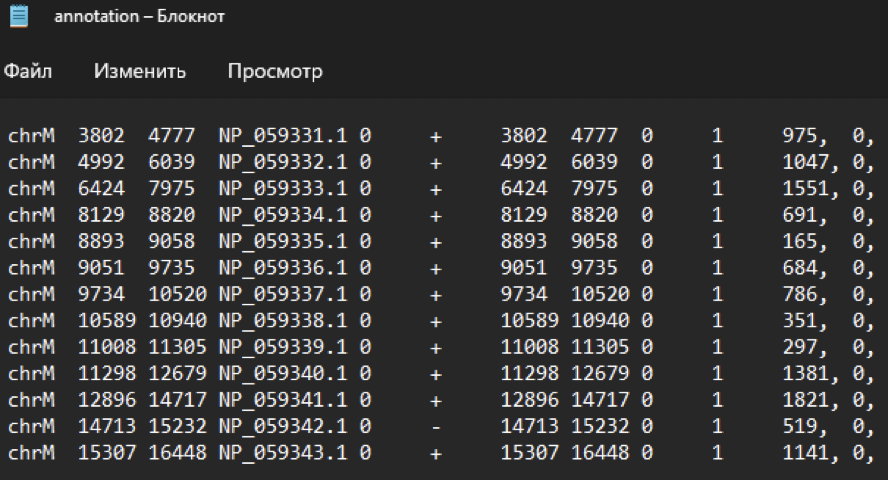

В результате анализа координат выявлено, что участки Z-ДНК не попадают ни в один ген, их координаты начинаются с 105 и до 1865, а у генов начало с 3802. Следовательно, все находятся в межгенном пространстве.

У G4: первые три попадают в межгенное пространство (координаты заканчиваются 3636), а четвёртый и пятый попадают в гены.

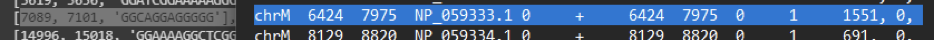

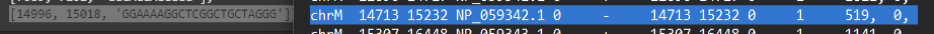

# **Предоставить список генов, в промоторы которых попадает Z- ДНК. Промоторами считать участки от начала генов и upstream 1000 bp.**

Для этого также скачиваем файл из TableBrowser (upstream 1000), но выбираем настройку не WholeGene, а UPSTREAM и указываем 1000. 

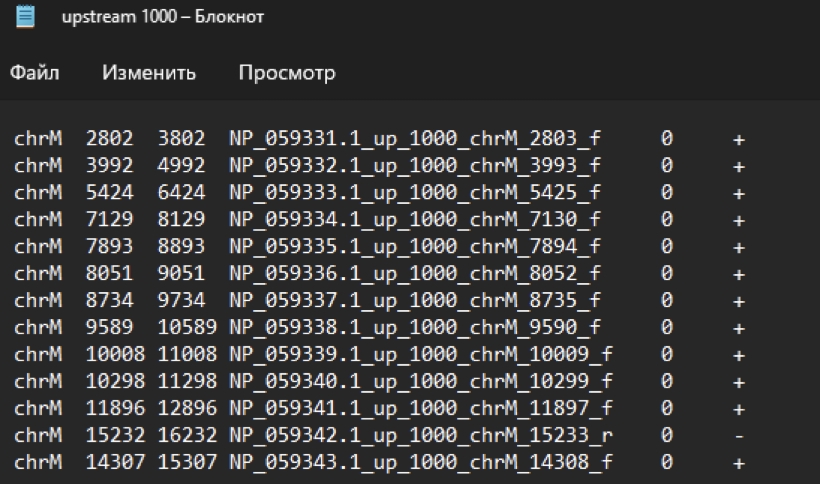

Как уже было написано раннее, Z-ДНК заканчиваются на 1865, следовательно в промоутеры они не попадают (начинается с 2802).

# **Предоставить список генов, в промоторы которых попадает квадруплексы.**

В результате анализа выявлено, что третий и пятый квадруплексы попадают в промоутеры:

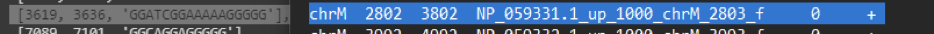

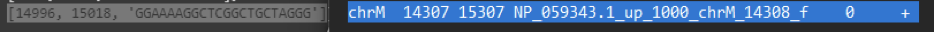

Список генов:
> NP_059331.1<br>
NP_059343.1



# **Сделать Gene Enrichment Analysis**

Переходим на [сайт](https://string-db.org/), нажимаем search, выбираем multiple proteins, находим нужный организм, и загружаем список генов (только два гена, поскольку в 4м задании их 0 получилось): <br>

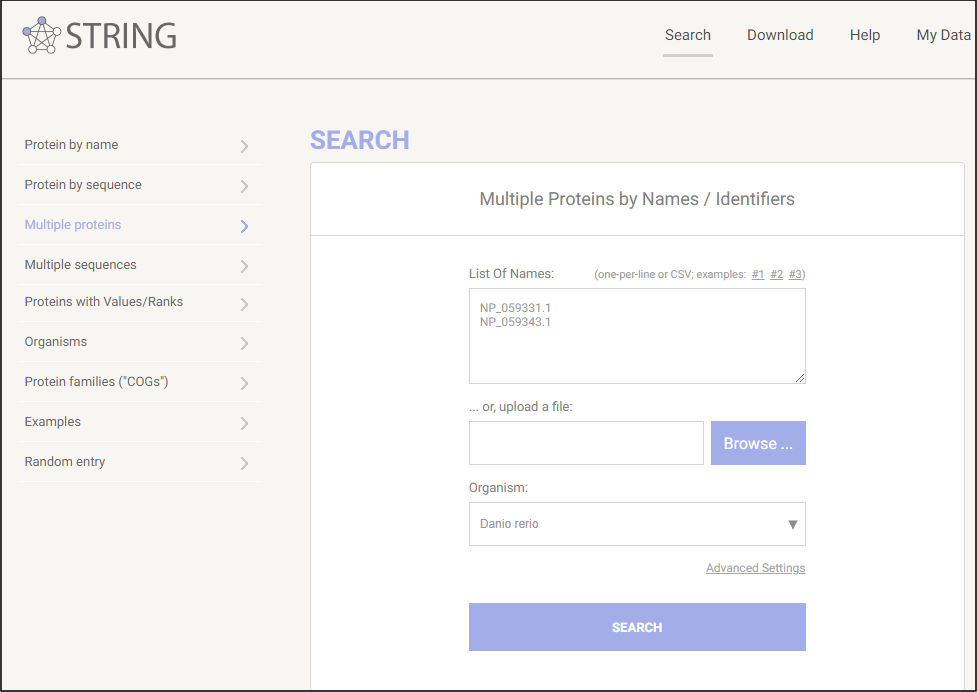

Результат анализа: <br>

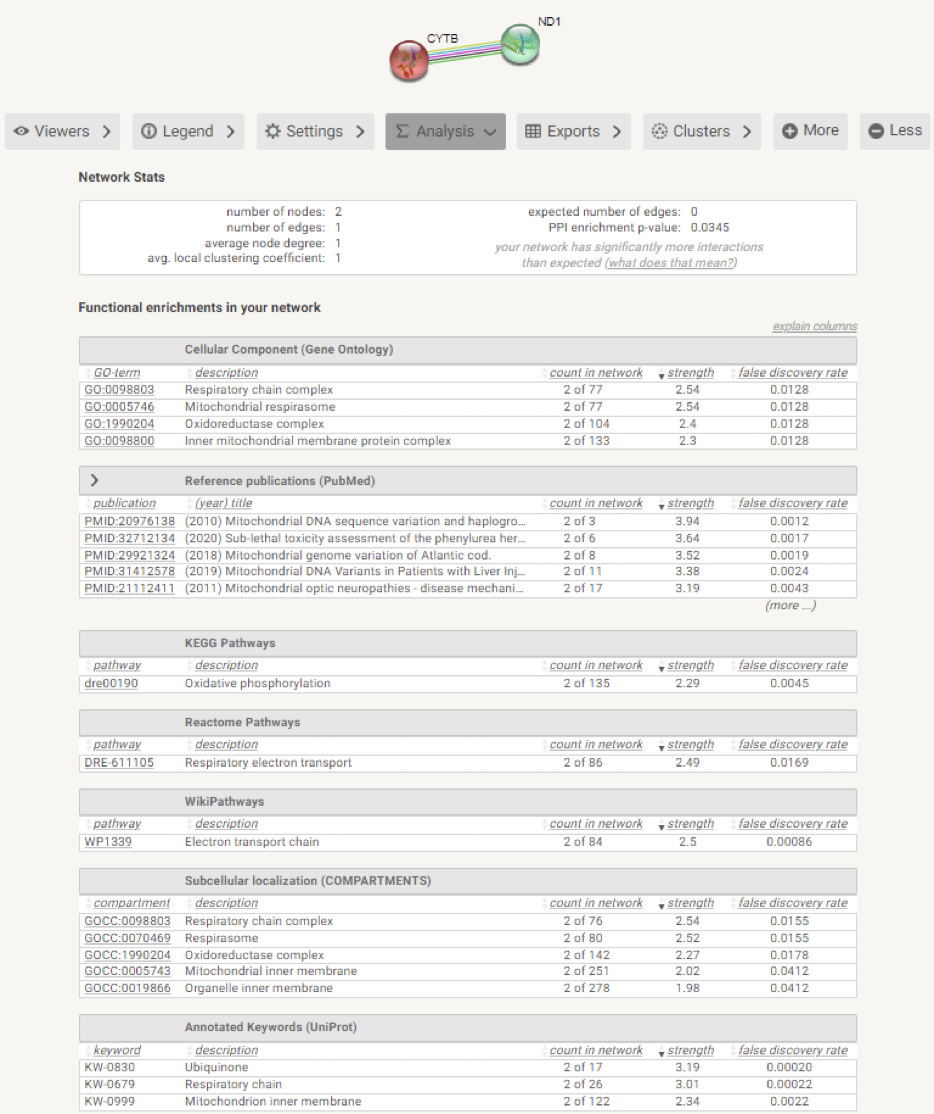

Таблица скачана с сайта (enrichment.all.tsv).